# 1. Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import random

# 2. Recolectar Datos y divicion de Datos

## Obtener

In [6]:
data = np.load('proyecto_data/proyecto_training_data.npy')
data.shape

(1460, 6)

In [7]:
df = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## Validar

Modifico los Nulls de LotFromtage a 0 por su descripcion, ya que indica los pies que tocan al un camino, siendo 0 no toca o null

In [8]:
for col in df:
    porcentaje = df[col].isnull().mean()
    if (porcentaje > 0):
        print(f'{col}: {porcentaje}')

LotFrontage: 0.1773972602739726


In [9]:
df['LotFrontage'].fillna(0, inplace = True)

## Dividir

In [10]:

size = np.shape(data)[0]
secctions = np.split(data, 20) # Dividimos en 20 secciones iguales
training_data = [] 
for i in range(16):
    training_data.append(secctions.pop(random.randint(0,15-i))) # Agarramos 16 de las secciones de manera aleaotria para hacer el 80% de entremaiento
validating_data = secctions # El resto se vuelve el 20% de validacion

In [11]:
# Los transformamos en Numpy Array
training_data = np.array(training_data)
validating_data = np.array(validating_data)

In [12]:
# Unimos las secciones para que tengan la misma forma que el original
training_data = np.reshape(training_data, [np.shape(training_data)[0] * np.shape(training_data)[1], np.shape(training_data)[2]])
validating_data = np.reshape(validating_data, [np.shape(validating_data)[0] * np.shape(validating_data)[1], np.shape(validating_data)[2]])

In [13]:
training_data.shape

(1168, 6)

In [14]:
df_training = pd.DataFrame(training_data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_training.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,132250.0,4.0,1040.0,5.0,1963.0,94.0
1,350000.0,9.0,1462.0,10.0,2004.0,74.0
2,148000.0,5.0,1155.0,6.0,1961.0,88.0
3,136500.0,5.0,864.0,6.0,1978.0,0.0
4,157000.0,5.0,1090.0,5.0,2005.0,60.0


In [15]:
validating_data.shape

(292, 6)

In [16]:
df_validating = pd.DataFrame(validating_data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_validating.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0


# 3. Anáslisis Exploratorio

## Funciones

In [17]:
def Analisis_Exploratorio(df):
    for col in df:
        df_describe = df[col].describe()
        print("---->\t" + col)

        print("Media:\t\t", df_describe['mean'])
        print("Minimo:\t\t", df_describe['min'])
        print("Maximo:\t\t", df_describe['max'])
        print("Rango:\t\t", (df_describe['max'] - df_describe['min']))
        print("Desviacion:\t", df_describe['std'])


        print("---------------------------------")
        print("---------------------------------")

## Sobre Data

In [18]:
Analisis_Exploratorio(df)

---->	SalePrice
Media:		 180921.19589041095
Minimo:		 34900.0
Maximo:		 755000.0
Rango:		 720100.0
Desviacion:	 79442.50288288663
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.0993150684931505
Minimo:		 1.0
Maximo:		 10.0
Rango:		 9.0
Desviacion:	 1.3829965467415923
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1162.626712328767
Minimo:		 334.0
Maximo:		 4692.0
Rango:		 4358.0
Desviacion:	 386.5877380410738
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.517808219178082
Minimo:		 2.0
Maximo:		 14.0
Rango:		 12.0
Desviacion:	 1.625393290584064
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.267808219178
Minimo:		 1872.0
Maximo:		 2010.0
Rango:		 138.0
Desviacion:	 30.202904042525265
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.62328767123287

## Sobre Training

In [19]:
Analisis_Exploratorio(df_training)

---->	SalePrice
Media:		 180590.27739726027
Minimo:		 34900.0
Maximo:		 755000.0
Rango:		 720100.0
Desviacion:	 78815.69790179154
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.101027397260274
Minimo:		 1.0
Maximo:		 10.0
Rango:		 9.0
Desviacion:	 1.3780252276191638
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1156.3236301369864
Minimo:		 334.0
Maximo:		 3228.0
Rango:		 2894.0
Desviacion:	 373.78037448865274
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.4854452054794525
Minimo:		 2.0
Maximo:		 14.0
Rango:		 12.0
Desviacion:	 1.6091407087243905
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.451198630137
Minimo:		 1875.0
Maximo:		 2010.0
Rango:		 135.0
Desviacion:	 29.951706606455257
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.61044520547

## Sobre Validating

In [20]:
Analisis_Exploratorio(df_validating)

---->	SalePrice
Media:		 182244.8698630137
Minimo:		 52500.0
Maximo:		 745000.0
Rango:		 692500.0
Desviacion:	 82026.89820184176
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.092465753424658
Minimo:		 3.0
Maximo:		 10.0
Rango:		 7.0
Desviacion:	 1.4050760024661666
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1187.8390410958905
Minimo:		 483.0
Maximo:		 4692.0
Rango:		 4209.0
Desviacion:	 433.84327159987083
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.647260273972603
Minimo:		 3.0
Maximo:		 12.0
Rango:		 9.0
Desviacion:	 1.685462205483712
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1970.5342465753424
Minimo:		 1872.0
Maximo:		 2009.0
Rango:		 137.0
Desviacion:	 31.2293729881195
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.67465753424658
M

# 4. Histogramas

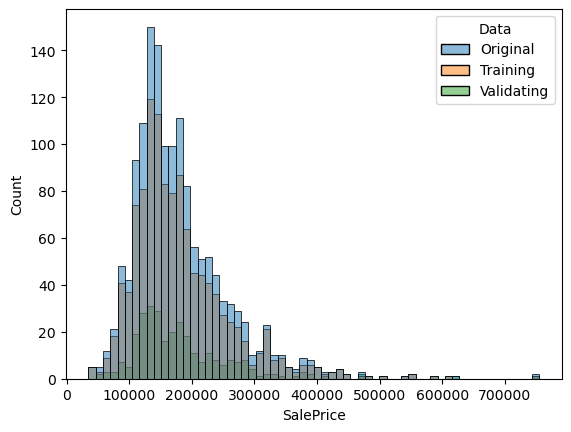

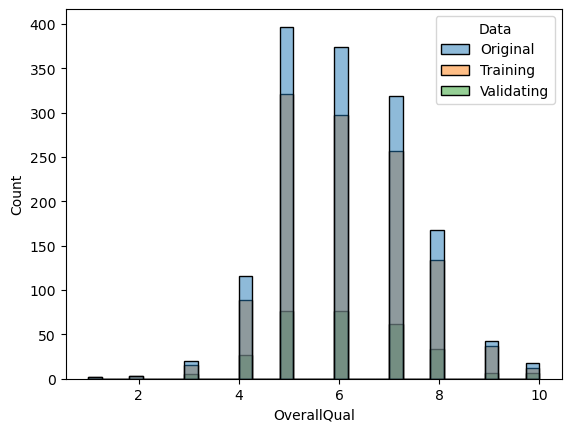

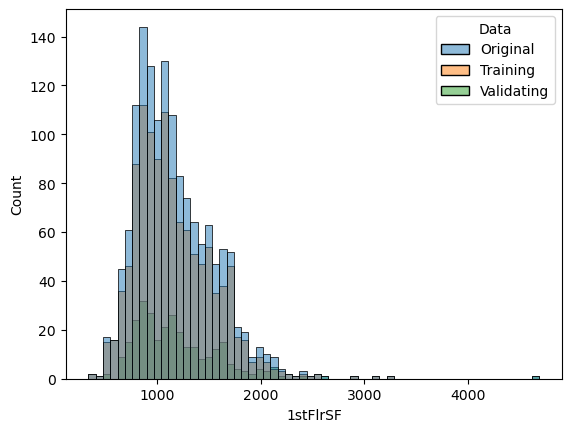

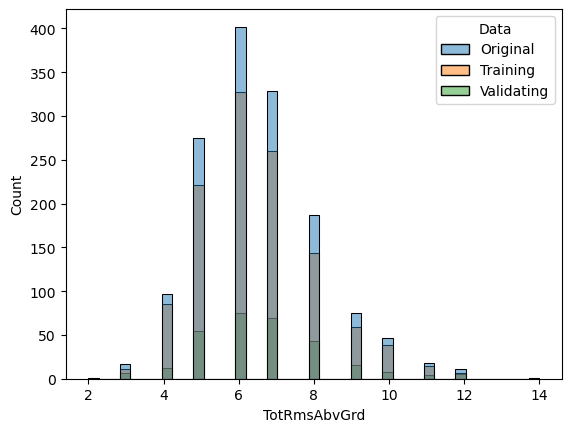

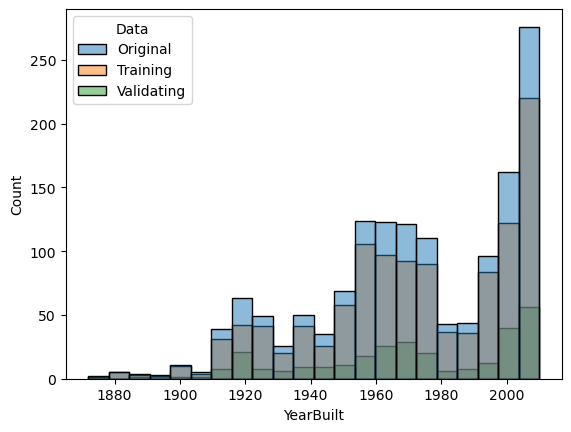

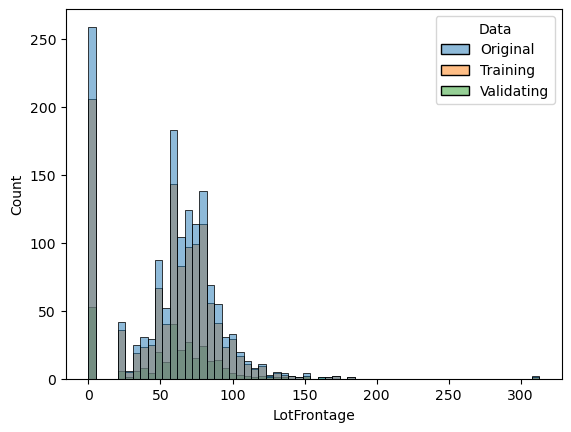

In [21]:
df['Data'] = np.full((df.shape[0]), 'Original')
df_training['Data'] = np.full((df_training.shape[0]), 'Training')
df_validating['Data'] = np.full((df_validating.shape[0]), 'Validating')
df_temp = pd.concat([df, df_training, df_validating], ignore_index = True) 

for col in df_temp.columns[:-1]:    
    sns.histplot(data=df_temp, x=col, hue='Data')
    plt.show()
    

df.drop('Data', axis = 1, inplace = True)
df_training.drop('Data', axis = 1, inplace = True)
df_validating.drop('Data', axis = 1, inplace = True)
del df_temp

# 5. Variables Independientes

## Funciones

In [22]:
def Analisis_var(df):
    corr = {}
    for col in df.columns[1:]:
        temp = np.corrcoef(x = df[col], y = df['SalePrice'])[0][1]
        corr[col] = temp
        plt.scatter(x =  df[col], y = df['SalePrice'])
        titulo = col + " | Correlacion: " + str(temp)
        plt.title(titulo)
        plt.show()
    dict(sorted(corr.items(), key=lambda item: item[1]))
    return list(corr.items())[0:2]

## Sobre Data

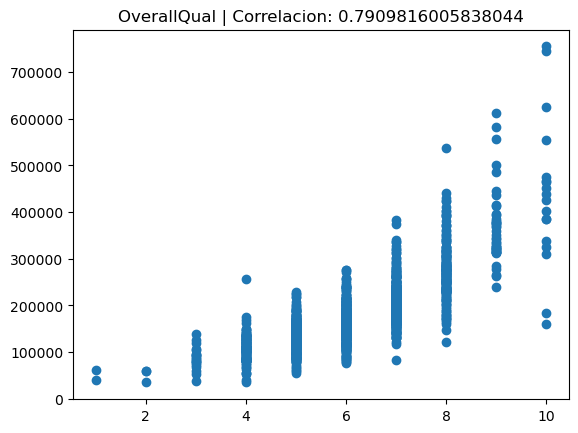

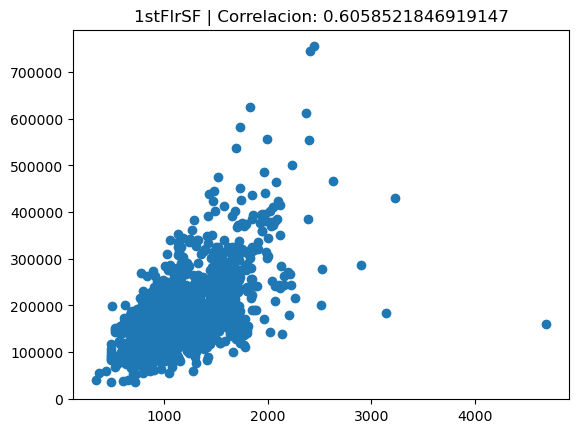

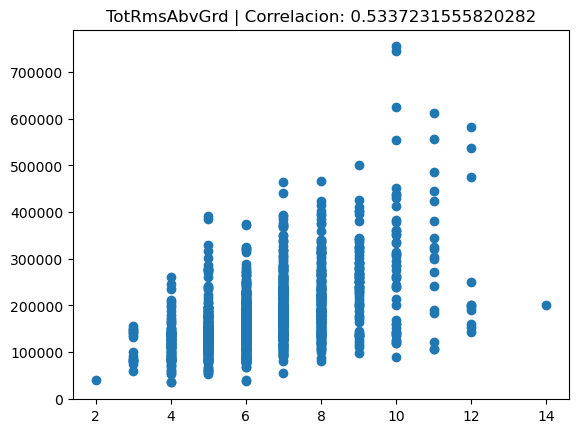

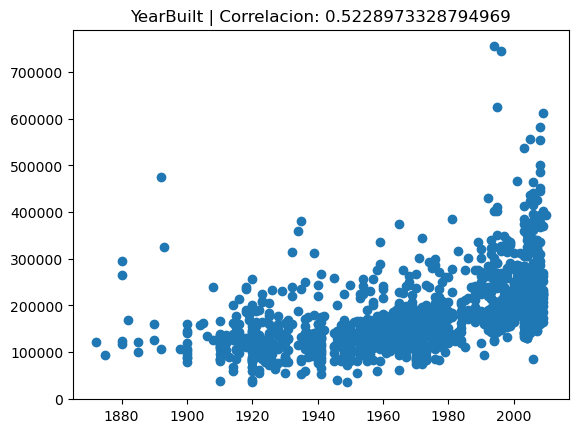

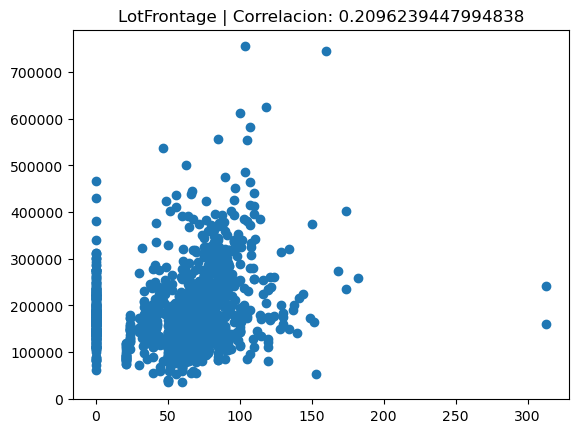

OverallQual: 0.7909816005838044
1stFlrSF: 0.6058521846919147


In [23]:
mejor_2_corr = Analisis_var(df)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

## Sobre Training

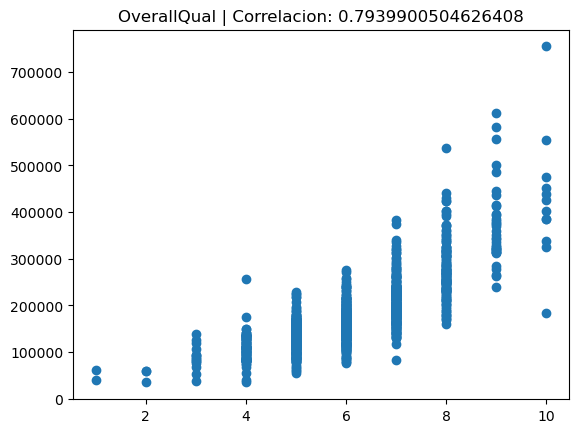

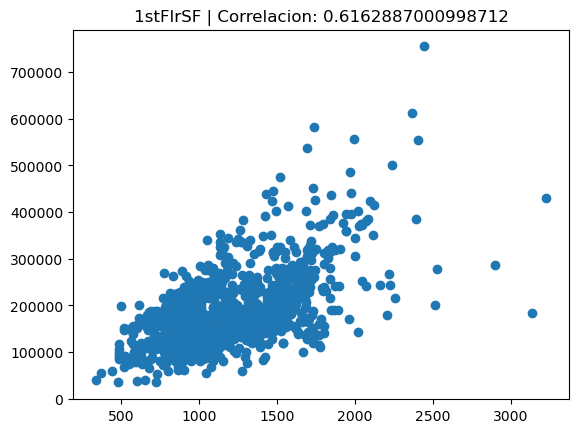

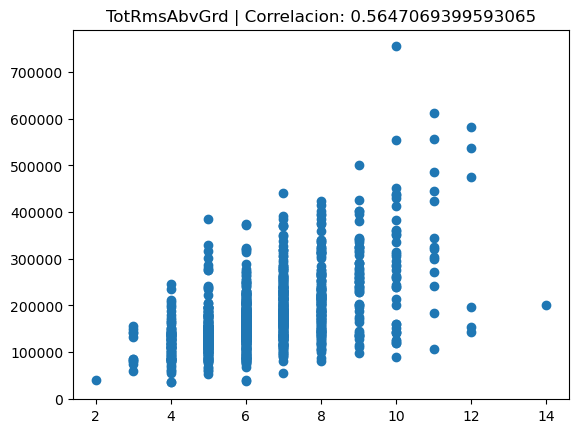

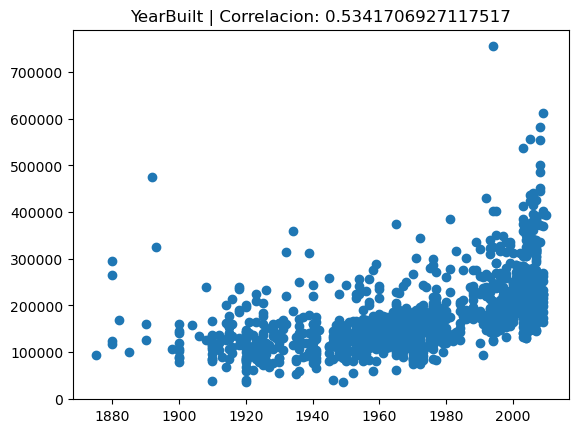

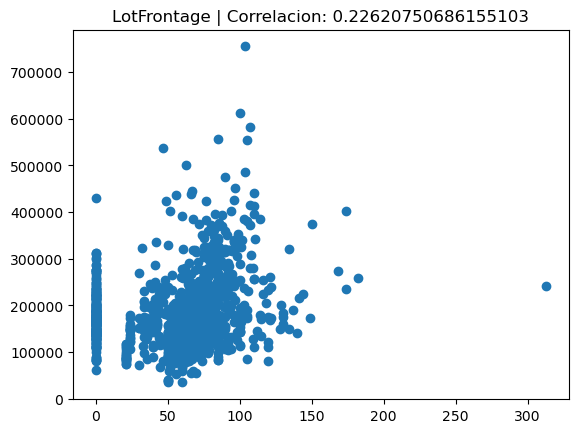

OverallQual: 0.7909816005838044
1stFlrSF: 0.6058521846919147


In [24]:
mejor_2_corr_train = Analisis_var(df_training)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

## Sobre Validating

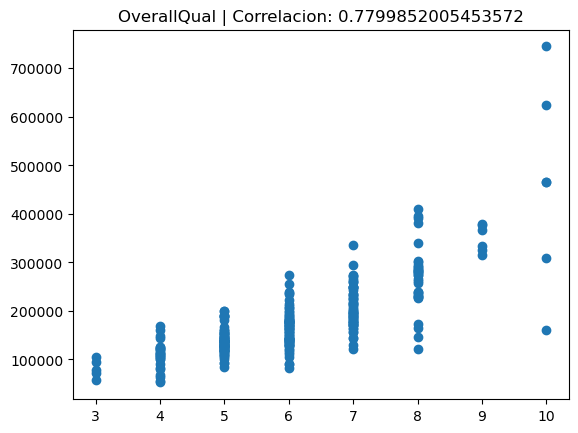

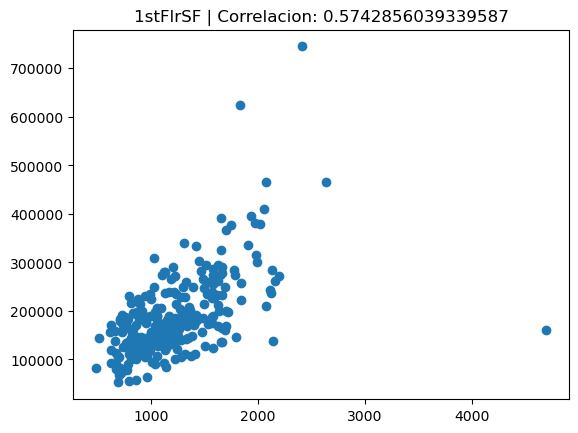

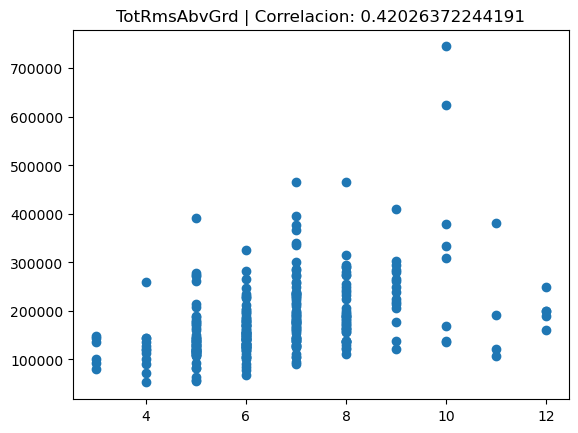

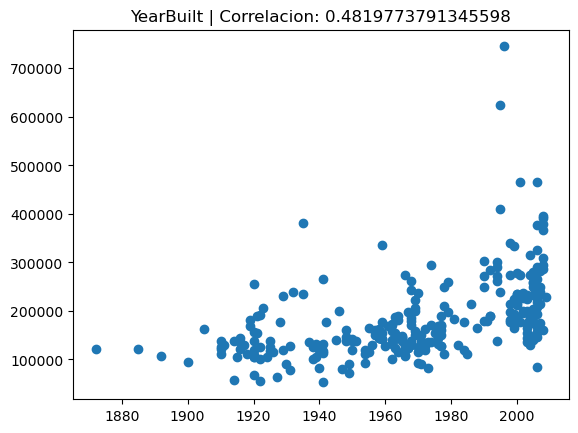

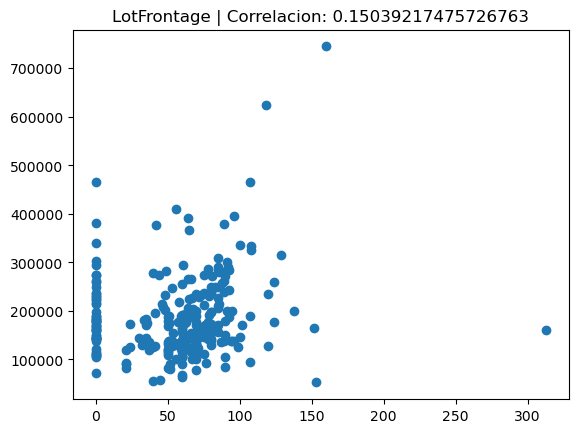

OverallQual: 0.7799852005453572
1stFlrSF: 0.5742856039339587


In [25]:
mejor_2_corr = Analisis_var(df_validating)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

# 6. Regresion Lineal

##  Funciones A mano


In [26]:
y = df_training['SalePrice'].values

In [27]:
def visualisar_costo(costos):
    plt.plot(range(len(costos)), costos)
    plt.xlabel('Epoch')
    plt.ylabel('Costo')
    plt.show()

In [28]:
def visualisar_betas(betas, n):
    betas = betas[::n]
    plt.plot(range(len(betas[:, 0])), betas[:, 0], label = 'B1')
    plt.plot(range(len(betas[:, 1])), betas[:, 1], label = 'B0')
    plt.xlabel('Epoch')
    plt.ylabel('Betas')
    plt.legend()
    plt.show()

### Regresion Con Plots y Prints

In [29]:
def regresion_linal_mano(x, y, epochs, imprimir_error_cada, alpha):
    # Inicializacion
    betas = np.array([random.random(), random.random()])
    matris = np.stack((x, np.ones(len(x))), axis = 1)
    betas_l = [betas]
    costos = []
    costo_anterior = 0
    for e in range(epochs):
        # Y_prima
        y_= np.dot(matris, betas)

        # Costo
        costo = np.sum((y-y_)**2)/(2*len(y))
        costos.append(costo)

        # Nuevos Betas
        b0_ = np.sum((y_-y))/len(y)
        b1_ = np.sum((y_-y)*x)/len(y)
        betas_primas = np.array([b1_, b0_])
        #betas[0] = betas[0] - (b1_*alpha)
        #betas[1] = betas[1] - (b0_*alpha)
        betas = (betas) - (betas_primas*alpha)
        
        betas_l.append(betas)
        
        
        cambio = costo_anterior - costo;
        
        
        # Costo Print
        if (e%imprimir_error_cada) == 0 :
            costo_anterior = costo
            if(e < 1000):
                print(f'Epoch {e}\t\t| Costo:{costo} \t| cambio: {cambio}')
            else:
                print(f'Epoch {e}\t| Costo:{costo} \t| cambio: {cambio}')
        
    betas_l = np.array(betas_l)
    visualisar_costo(costos)
    visualisar_betas(betas_l, 10)
    return (betas_l, costos)        

### Regresion Sin Plots y Prints

In [30]:
def regresion_linal_mano_alt(x, y, epochs, alpha):
    # Inicializacion
    betas = np.array([random.random(), random.random()])
    matris = np.stack((x, np.ones(len(x))), axis = 1)
    betas_l = [betas]
    costos = []
    for e in range(epochs):
        # Y_prima
        y_= np.dot(matris, betas)

        # Costo
        costo = np.sum((y-y_)**2)/(2*len(y))
        costos.append(costo)

        # Nuevos Betas
        b0_ = np.sum((y_-y))/len(y)
        b1_ = np.sum((y_-y)*x)/len(y)
        betas_primas = np.array([b1_, b0_])
        #betas[0] = betas[0] - (b1_*alpha)
        #betas[1] = betas[1] - (b0_*alpha)
        betas = (betas) - (betas_primas*alpha)
        
        betas_l.append(betas)
        
    betas_l = np.array(betas_l)
    return (betas_l, costos) 

## Funciones SciKit

In [31]:
def regresion_lineal_scikit(x, y):
    mod = LinearRegression()
    mod.fit(x.reshape(-1,1), y)
    return [(mod.coef_[0]), mod.intercept_]

## Funcion Final

In [33]:
def comparacion_regresiones(x, manual, sk):
    
    x = np.stack((x, np.ones(len(x))), axis = 1)
    
    # Manual
    manual_y = np.dot(x, manual)
    
    # SciKitLearn
    sk_y = np.dot(x, sk)
    
    prom_y = (manual_y + sk_y)/2
    
    return (manual_y, sk_y, prom_y)
    

## Regresion 2 Mejores



------> OverallQual
Epoch 0		| Costo:19408771234.752617 	| cambio: -19408771234.752617
Epoch 1000	| Costo:1154767815.9095619 	| cambio: 18254003418.843056
Epoch 2000	| Costo:1147164947.2658224 	| cambio: 7602868.643739462
Epoch 3000	| Costo:1146924098.81419 	| cambio: 240848.4516324997
Epoch 4000	| Costo:1146916469.0655553 	| cambio: 7629.7486345767975


Epoch 5000	| Costo:1146916227.3655822 	| cambio: 241.69997310638428
Epoch 6000	| Costo:1146916219.7088587 	| cambio: 7.656723499298096
Epoch 7000	| Costo:1146916219.4663043 	| cambio: 0.2425544261932373
Epoch 8000	| Costo:1146916219.4586205 	| cambio: 0.007683753967285156
Epoch 9000	| Costo:1146916219.4583766 	| cambio: 0.00024390220642089844


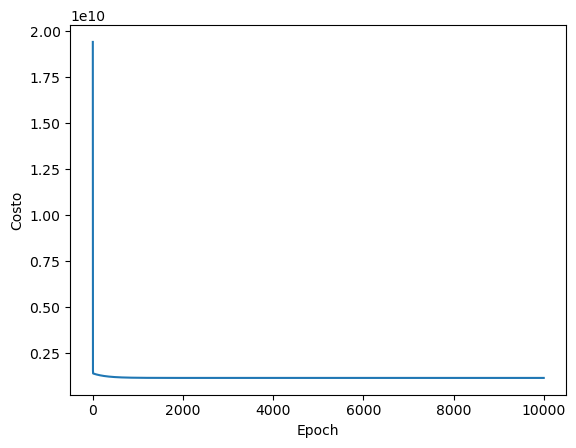

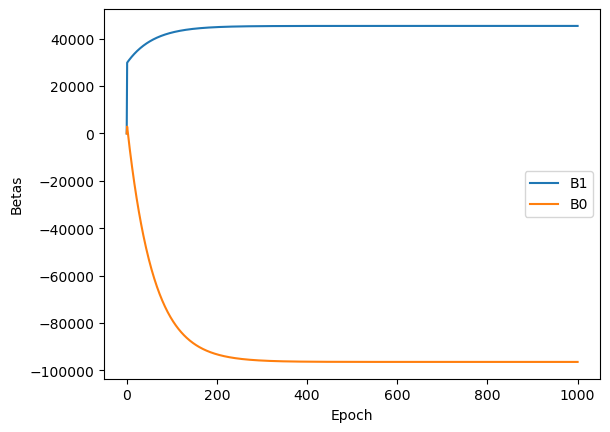


--------------------
Manual:
 [ 85178.42500871 312238.41638644 130590.42328425 ... 221414.41983535
 130590.42328425 130590.42328425]
--------------------
--------------------
SciKit:
 [ 85178.4237979  312238.41769369 130590.42257706 ... 221414.42013537
 130590.42257706 130590.42257706]
--------------------
--------------------
Promedio:
 [ 85178.4244033  312238.41704007 130590.42293065 ... 221414.41998536
 130590.42293065 130590.42293065]
--------------------


------> 1stFlrSF
Epoch 0		| Costo:19322403635.030087 	| cambio: -19322403635.030087
Epoch 1000	| Costo:1968088163.9204319 	| cambio: 17354315471.109653
Epoch 2000	| Costo:1968083253.5340986 	| cambio: 4910.386333227158
Epoch 3000	| Costo:1968078343.7025816 	| cambio: 4909.831516981125
Epoch 4000	| Costo:1968073434.4258168 	| cambio: 4909.27676486969
Epoch 5000	| Costo:1968068525.703742 	| cambio: 4908.722074747086
Epoch 6000	| Costo:1968063617.536295 	| cambio: 4908.167447090149
Epoch 7000	| Costo:1968058709.9234126 	| cambio: 

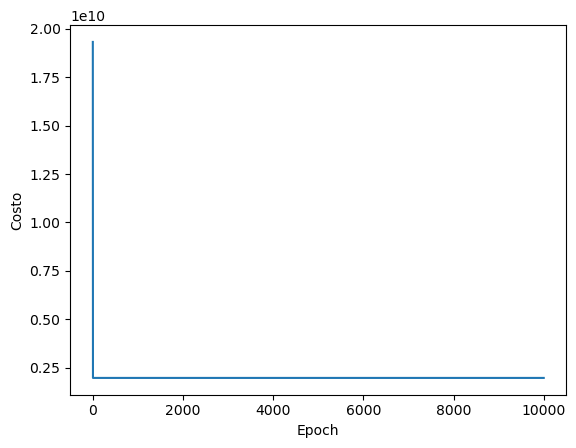

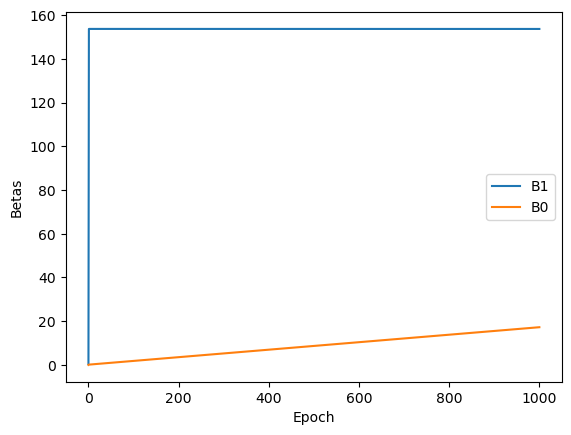


--------------------
Manual:
 [159848.2474884  224702.74753826 177521.86717023 ... 105905.28654645
 160001.9311378  209488.06624694]
--------------------
--------------------
SciKit:
 [165473.87715361 220313.30139879 180418.27001663 ... 119860.99111081
 165603.82839589 207448.12841236]
--------------------
--------------------
Promedio:
 [162661.062321   222508.02446852 178970.06859343 ... 112883.13882863
 162802.87976685 208468.09732965]
--------------------


In [34]:
# Guardamos arrabia las dos mas mejores
for col in mejor_2_corr_train:
    
    print('\n\n------>', col[0])
    
    descripcion = df_training[col[0]].describe()
    alpha = 1/(((descripcion['max'] - descripcion['min'])/2)*descripcion['mean'])
    
    x = df_training[col[0]].values
    
    reg_m = regresion_linal_mano(x, y, 10000, 1000, alpha)
    reg_m = reg_m[0][-1]
    reg_sk = regresion_lineal_scikit(x, y)
    
    comp = comparacion_regresiones(x, reg_m, reg_sk)
    
    print('\n--------------------')
    print('Manual:\n', comp[0])
    print('--------------------')
    print('--------------------')
    print('SciKit:\n', comp[1])
    print('--------------------')
    print('--------------------')
    print('Promedio:\n', comp[2])
    print('--------------------')
    print('======================')

# 7. Validacion



------> OverallQual 	 Dif. RMSE: Mano - SciKit = -3.88491025660187e-06 | Dif. R2: Mano - SciKit = 5.94264637499009e-11


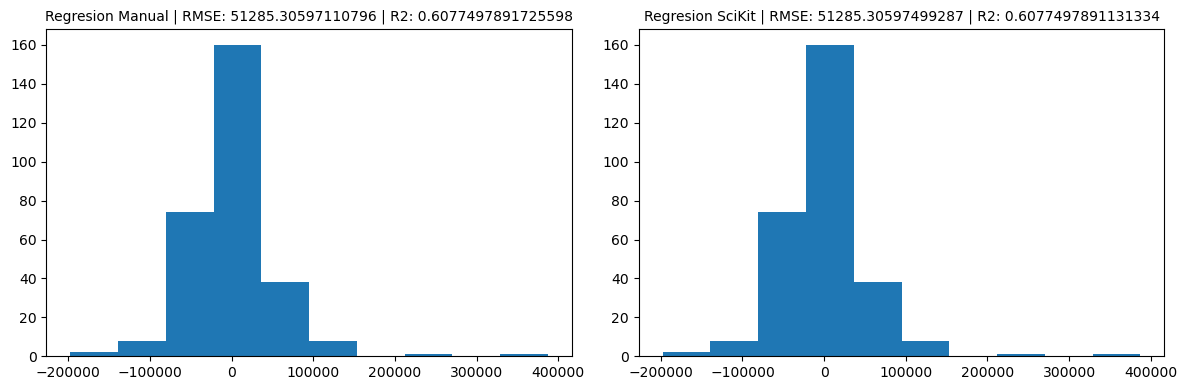



------> 1stFlrSF 	 Dif. RMSE: Mano - SciKit = 2108.876970458674 | Dif. R2: Mano - SciKit = -0.04325776958884642


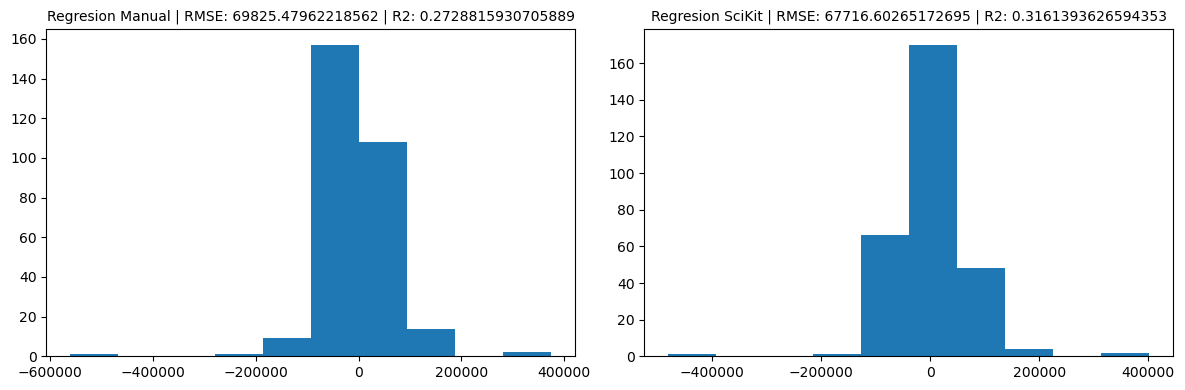

----------------------------------------------------------------
El mejor es OverallQual
----------------------------------------------------------------


In [40]:
mejor = ["", 0.0]
for col in mejor_2_corr_train:
    
    
    
    descripcion = df_training[col[0]].describe()
    alpha = 1/(((descripcion['max'] - descripcion['min'])/2)*descripcion['mean'])
    
    x = df_training[col[0]].values
    
    # Hacemos las regresiones
    reg_m = regresion_linal_mano_alt(x, y, 10000, alpha)
    reg_m = reg_m[0][-1]
    reg_sk = regresion_lineal_scikit(x, y)
    
    x = df_validating[col[0]].values
    comp = comparacion_regresiones(x, reg_m, reg_sk) #
    
    # Calculamos error
    man_error = (df_validating['SalePrice'] - comp[0])
    sk_error = (df_validating['SalePrice'] - comp[1])
    
    # Calculamos Root Mean Squerad Error
    rmse_man = mean_squared_error(df_validating['SalePrice'], comp[0])**0.5
    rmse_sk = mean_squared_error(df_validating['SalePrice'], comp[1])**0.5
    
    # Calculamos R2
    r2_man = r2_score(df_validating['SalePrice'], comp[0])
    r2_sk = r2_score(df_validating['SalePrice'], comp[1])
    
    actual = [col[0], (rmse_man + rmse_sk) / 2]
    
    if((actual[1] < mejor[1]) or (mejor[1] == 0.0)):
        
        mejor = actual
    
    print(f'\n\n------> {col[0]} \t Dif. RMSE: Mano - SciKit = {rmse_man - rmse_sk} | Dif. R2: Mano - SciKit = {r2_man - r2_sk}')
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    plt.hist(man_error)
    plt.title(f'Regresion Manual | RMSE: {rmse_man} | R2: {r2_man}', fontsize = 10)
    plt.subplot(1,2,2)
    plt.hist(sk_error)
    plt.title(f'Regresion SciKit | RMSE: {rmse_sk} | R2: {r2_sk}', fontsize = 10)
    plt.tight_layout()
    plt.show()
    

print("----------------------------------------------------------------")

print("El mejor es", mejor[0])

print("----------------------------------------------------------------")    
    